In [33]:
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Input
)
from tensorflow.keras import Model
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2


In [34]:
path = Path('data')
X_train = np.load(path/'X_train.npy')
y_train = np.load(path/'y_train.npy')
X_test = np.load(path/'X_test.npy')
test_images = np.load(path/'X_test.npy') 
y_test = np.load(path/'y_test.npy')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((366, 32, 32, 3), (366, 5), (92, 32, 32, 3), (92, 5))

In [35]:
test_images.shape

(92, 32, 32, 3)

In [36]:
EPOCHS = 100
BATCH_SIZE = 32
IMG_SIZE = X_train.shape[1]
X_test.shape

(92, 32, 32, 3)

In [37]:
def filter_grey(X:np.ndarray):
    new_x = []
    for i in range(len(X)):
        img = X[i]
        # np array to cv2 imag        
        # grey scale
        #result = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        result = img / 255
        new_x.append(result)
    return np.array(new_x)

X_train = filter_grey(X_train)
X_test = filter_grey(X_test)




[0. 0. 0. 0.]
[0.73046875 0.4921875  0.22265625 0.4453125 ]
[0.38671875 0.3671875  0.22265625 0.4453125 ]
[0.38671875 0.3828125  0.26171875 0.5234375 ]
[0.15234375 0.05859375 0.22265625 0.4453125 ]
[0.28515625 0.328125   0.22265625 0.4453125 ]


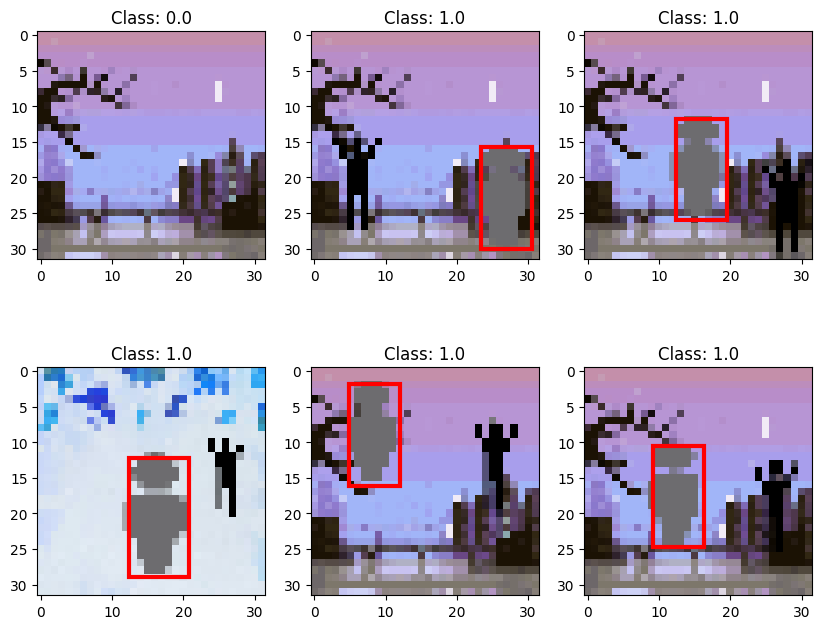

In [38]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
images = np.random.choice(X_train.shape[0], 6)
for i in range(2):
    for j in range(3):
        rect = y_train[images[i * 3 + j]][1:]
        label = y_train[images[i * 3 + j]][0]
        print(rect)
        x, y, w, h = rect
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor="red",
                lw=3,
            )
        )
        ax[i,j].set_title(f"Class: {label}")
        ax[i, j].imshow(X_train[images[i * 3 + j]], cmap="gray")

plt.show()


In [39]:
def build_model():
    # Define model layers.
    input_layer = Input(name= 'input' ,shape=(IMG_SIZE, IMG_SIZE, 3))
    first_dense = Conv2D(32, (6,6), activation='relu', name='conv1')(input_layer)
    second_dense = Conv2D(32, (6,6), activation='relu', name='conv2')(first_dense)
    flatten_layer = Flatten(name= 'flatten' )(second_dense)
    third_dense = Dense(units=8,activation='relu', name='relu1')(flatten_layer)
    y1_output = Dense(units=1, name='classification')(third_dense)
    y2_output = Dense(units=4,name='regression',activation='relu')(third_dense)
    model = Model(inputs=input_layer,outputs=[y1_output, y2_output])
    return model



In [40]:
model = build_model()
optimizer = Adam()
model.compile(optimizer=optimizer, loss={'classification': 'binary_crossentropy', 'regression': 'mse'})
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 27, 27, 32)   3488        ['input[0][0]']                  
                                                                                                  
 conv2 (Conv2D)                 (None, 22, 22, 32)   36896       ['conv1[0][0]']                  
                                                                                                  
 flatten (Flatten)              (None, 15488)        0           ['conv2[0][0]']                  
                                                                                            

In [41]:
#history = model.fit(X_train, y_train[:,1:], epochs=EPOCHS, batch_size=BATCH_SIZE)
history = model.fit(X_train, {'classification': y_train[:,0], 'regression': y_train[:,1:]}, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100
12/12 [==============================] - 3s 98ms/step - loss: 4.2162 - classification_loss: 3.8858 - regression_loss: 0.3304
Epoch 2/100
12/12 [==============================] - 1s 100ms/step - loss: 3.1215 - classification_loss: 2.9159 - regression_loss: 0.2056
Epoch 3/100
12/12 [==============================] - 1s 102ms/step - loss: 1.0002 - classification_loss: 0.9392 - regression_loss: 0.0611
Epoch 4/100
12/12 [==============================] - 1s 94ms/step - loss: 2.5999 - classification_loss: 2.4967 - regression_loss: 0.1032
Epoch 5/100
12/12 [==============================] - 1s 93ms/step - loss: 1.6691 - classification_loss: 1.6034 - regression_loss: 0.0657
Epoch 6/100
12/12 [==============================] - 1s 90ms/step - loss: 3.3444 - classification_loss: 3.1971 - regression_loss: 0.1472
Epoch 7/100
12/12 [==============================] - 1s 89ms/step - loss: 1.6329 - classification_loss: 1.5649 - regression_loss: 0.0680
Epoch 8/100
12/12 [====================

<AxesSubplot: >

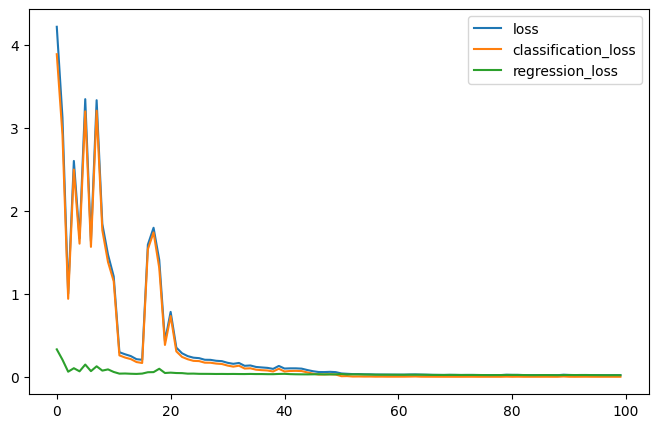

In [42]:
pd.DataFrame(history.history).plot(figsize=(8, 5))


In [43]:
# sample predict
pred = model.predict(X_test[:1])
pred[0].shape, pred[1].shape

1/1 [==============================] - 0s 193ms/step


((1, 1), (1, 4))

[0.27236122 0.22851257 0.08289409 0.38745075]
[0.09545063 0.01165073 0.02551082 0.05055479]
[0.25109994 0.17547175 0.22390741 0.313457  ]
[0.3066696  0.26266724 0.1373429  0.44297203]
[0.27284703 0.2180614  0.14361575 0.37465662]
[0.28868413 0.23788306 0.14651546 0.4053225 ]


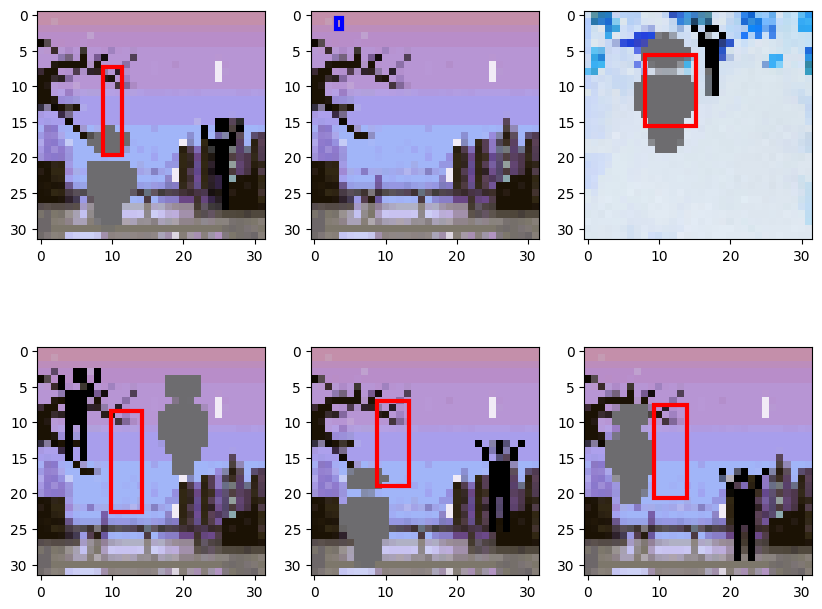

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
imgs = np.random.choice(X_test.shape[0], 6)
for i in range(2):
    for j in range(3):
        index = np.random.randint(0, X_test.shape[0])
        rect = model.predict(X_test[index:index+1], verbose=0)[1][0]
        classification = model.predict(X_test[index:index+1], verbose=0)[0][0]
        print(rect)
        x, y, w, h = rect
        color = 'red' if classification > 0.5 else 'blue'
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor=color,
                lw=3,
            )
            )
        # draw true rect 
        
        ax[i, j].imshow(test_images[index]/ 255)
plt.show()
